• DOMAIN: Botanical research

• CONTEXT: University X is currently undergoing some research involving understanding the characteristics of
plant and plant seedlings at various stages of growth. They already have have invested on curating sample
images. They require an automation which can create a classifier capable of determining a plant's species from a
photo

• DATA DESCRIPTION: The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/
plant-seedlings-classification/data

• PROJECT OBJECTIVE: University’s management require an automation which can create a classifier capable of determining a plant's species from a photo

Steps and tasks:
1. Import the data. Analyse the dimensions of the data. Visualise the data.
2. Design, train tune and test the best AIML image classifier model using:
• Supervised learning algorithms
• Neural networks
• CNN
3. Compare the results from the above step along with your detailed observations on the best performing algorithm and
why/how it outperforms other algorithms in this case.
4. Pickle the best performing model.
5. Import the the test image [ from the “ Prediction” folder ] to predict the class. Display the image. Use the best trained
image classifier model to predict the class.

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [32]:
#import the reqired libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.externals import joblib
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
import missingno as mno
!pip install rake_nltk
from rake_nltk import Rake

from numpy import array
from numpy import diag
from numpy import dot
from scipy.linalg import svd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model

import h5py
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers

import matplotlib.pyplot as plt
import tensorflow as tf
import random
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__
from glob import glob
import cv2
from keras.utils import np_utils
from sklearn import preprocessing
from tensorflow.keras.layers import Conv2D
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)

# to suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import itertools


'2.6.0'

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')


Mounted at /content/drive/


In [5]:
!ls "/content/drive/MyDrive/Colab Notebooks/CV/CV/train"

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


In [6]:
file1_DF = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CV/Test Data-annotation.csv", encoding = "ISO-8859-1")
file1_DF

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet
...,...,...
789,fea355851.png,Sugar beet
790,fea3da57c.png,Sugar beet
791,fef2ade8c.png,Sugar beet
792,ff65bc002.png,Sugar beet


In [7]:
train_path = "/content/drive/MyDrive/Colab Notebooks/CV/CV/train/*/*.png"

train_files = glob(train_path)

train_dir = "/content/drive/MyDrive/Colab Notebooks/CV/CV/train"

1. Import the data. Analyse the dimensions of the data. Visualise the data.

In [8]:
path = "/content/drive/MyDrive/Colab Notebooks/CV/CV/train/*/*.png"      
files = glob(path)

#resizing to 128x128
trainImg = []
trainLabel = []                                            

index = 1
num = len(files)
for img in files:
    trainImg.append(cv2.resize(cv2.imread(img), (128, 128)))
    trainLabel.append(img.split('/')[-2])
    index += 1
print("images loaded based on label")
trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)  # Train labels set

images loaded based on label


LabelEncoder()

image types: 
['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']

Number of classes: 12


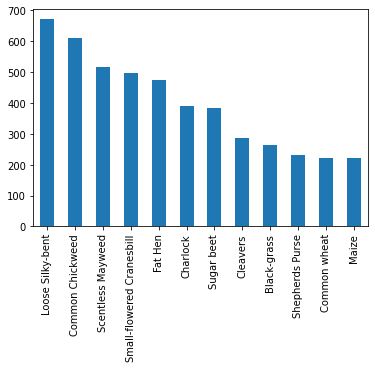

In [9]:
labelEncode = preprocessing.LabelEncoder()
labelEncode.fit(trainLabel[0])
print("image types: \n" + str(labelEncode.classes_))
encodedTrainLabels = labelEncode.transform(trainLabel[0])

#one hot encoding
clearTrainLabel = np_utils.to_categorical(encodedTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("\nNumber of classes: " + str(num_clases))

trainLabel[0].value_counts().plot(kind='bar')

In [10]:
#check the shape and size
print(trainImg.shape)
print(trainLabel.shape)

(4767, 128, 128, 3)
(4767, 1)


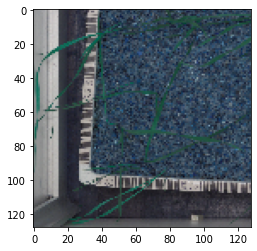

In [11]:
#viewing an image the data 
plt.imshow(trainImg[21])

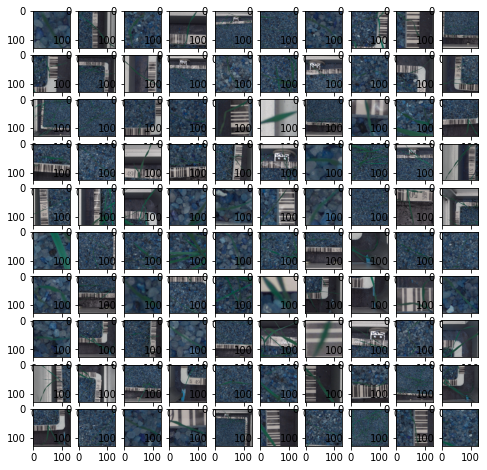

In [12]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=trainImg[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

using GaussianBlur to remove noise from images

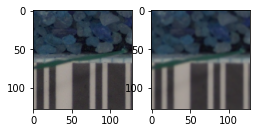

In [13]:
GBimg = []
getEx = True
for img in trainImg:
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   

    GBimg.append(blurImg)
    if getEx:
            plt.subplot(2, 3, 1); plt.imshow(img)  
            plt.subplot(2, 3, 2); plt.imshow(blurImg)  
            getEx = False

GBimg = np.asarray(GBimg)

Now normalise the images and divide it by max pixel value 255

In [14]:
blurred_img_norm = GBimg/255.0 #normalization

In [15]:
#gray image
gray_img = [cv2.cvtColor(trainImg[i],cv2.COLOR_BGR2GRAY) for i in range(len(trainImg))] #converting color to gray image 
blurred_gray_img = [cv2.blur(gray_img[i],(5,5)) for i in range(len(trainImg))] 
blurred_gray_norm = np.array(blurred_gray_img)/255.0

Images before and After the pre-processing

<Figure size 864x864 with 0 Axes>

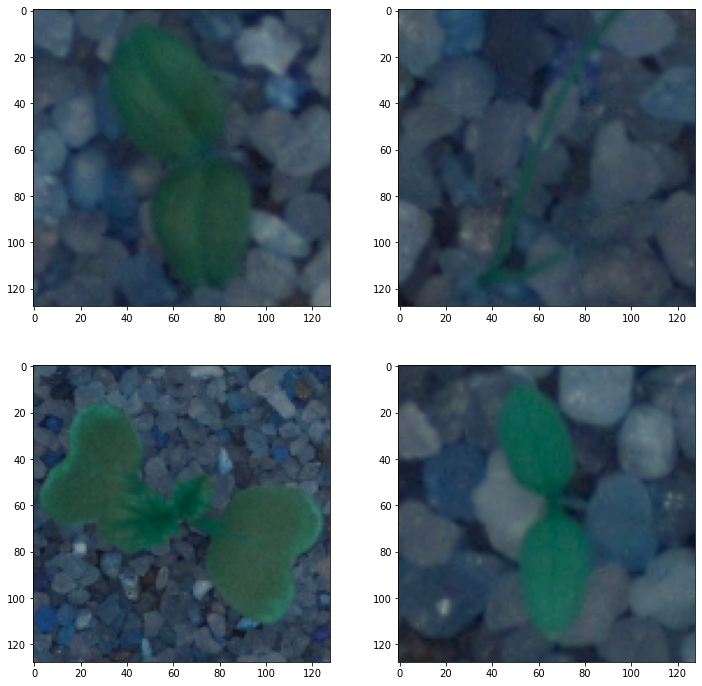

In [16]:
# vizualizing some random images
plt.figure(figsize=(12,12))
idx=[]
for i in range(4):
    index = randint(200, 3000)
    idx.append(index)
    plt.subplot(2,2,i+1)
    plt.imshow(trainImg[index]) 
plt.show()

In [17]:
#Split images into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(blurred_img_norm, clearTrainLabel, 
                                                test_size=0.30, random_state=21, 
                                                stratify = clearTrainLabel)

In [18]:
#pick 50% validation images from test set 
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=21)

#### 2. Design, train tune and test the best AIML image classifier model using: • Supervised learning algorithms • Neural networks • CNN

In [81]:
#DataFrame for accuracies of different models
accuracyScore = ['Model', 'Accuracy']
resultsdf1 = pd.DataFrame(columns = accuracyScore)
print(resultsdf1)

Empty DataFrame
Columns: [Model, Accuracy]
Index: []


supervised learning

In [20]:
print("Actual training data shape : ", X_train.shape)
print("Actual training label shape : ", y_train.shape)

#Flattening the training data
nsamples, nx, ny, nz = X_train.shape
X_trainReshape = X_train.reshape((nsamples,nx*ny*nz))
print("flattened training data shape : " ,X_trainReshape.shape)

#Flattening the testing data
nsamples, nx, ny, nz = X_val.shape
X_ValReshape = X_val.reshape((nsamples,nx*ny*nz))

Actual training data shape :  (3336, 128, 128, 3)
Actual training label shape :  (3336, 12)
flattened training data shape :  (3336, 49152)


In [21]:
MNB = MultinomialNB()
# Training model
MNB.fit(X_trainReshape,(np.argmax(y_train ,axis=-1)))

# Predicting for all of test dataset
pred = MNB.predict(X_ValReshape)

print("\nAccuracy Score of training set: {}".format(accuracy_score(np.argmax(y_train, axis=1),MNB.predict(X_trainReshape))))
print("\nAccuracy Score of testing set: {}".format(accuracy_score(np.argmax(Y_val, axis=1),pred)))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Accuracy Score of training set: 0.3669064748201439

Accuracy Score of testing set: 0.25


<Figure size 1080x1080 with 0 Axes>

Text(114.0, 0.5, 'Actual Label')

Text(0.5, 186.89999999999995, 'Pred Label')

Text(0.5, 1.0, 'Accuracy Score for MultinomialNB: 0.25')

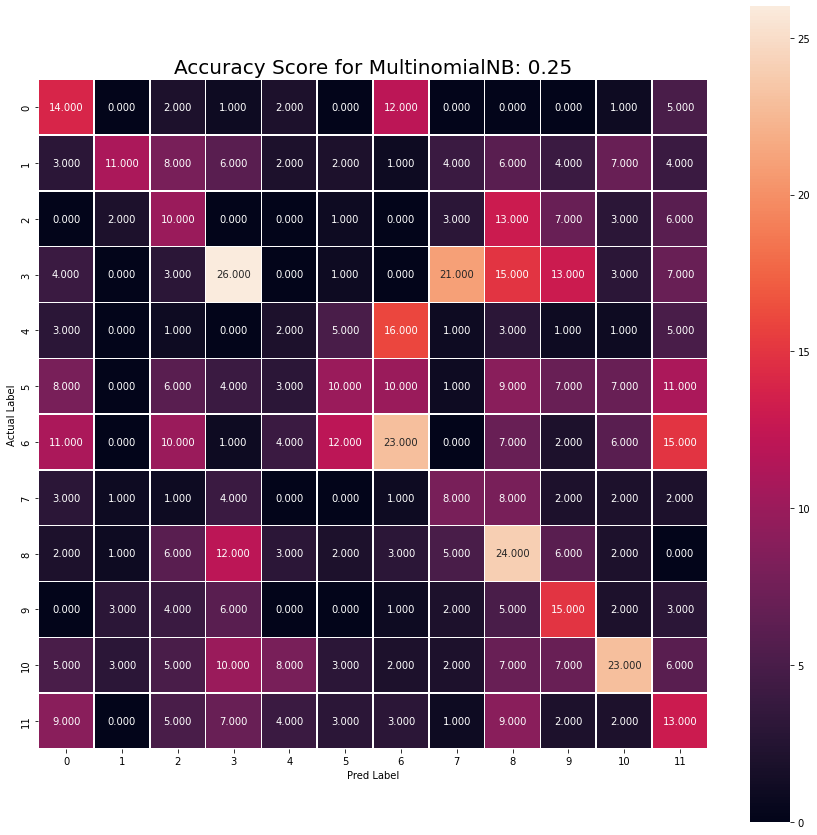

In [22]:
cm = confusion_matrix(np.argmax(Y_val, axis=1), pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True)
plt.ylabel('Actual Label')
plt.xlabel('Pred Label')
all_sample_title = 'Accuracy Score for MultinomialNB: {0}'.format(accuracy_score(np.argmax(Y_val, axis=1), pred))
plt.title(all_sample_title, size = 20)

In [23]:
# Classification Report
cr = classification_report(np.argmax(Y_val, axis=1),pred)
print(cr)

              precision    recall  f1-score   support

           0       0.23      0.38      0.28        37
           1       0.52      0.19      0.28        58
           2       0.16      0.22      0.19        45
           3       0.34      0.28      0.31        93
           4       0.07      0.05      0.06        38
           5       0.26      0.13      0.17        76
           6       0.32      0.25      0.28        91
           7       0.17      0.25      0.20        32
           8       0.23      0.36      0.28        66
           9       0.23      0.37      0.28        41
          10       0.39      0.28      0.33        81
          11       0.17      0.22      0.19        58

    accuracy                           0.25       716
   macro avg       0.26      0.25      0.24       716
weighted avg       0.28      0.25      0.25       716



In [82]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf = pd.DataFrame({'Model':['MultinomialNB'],'Accuracy': (accuracy_score(np.argmax(Y_val, axis=1), pred))},index={'1'})
resultsdf1 = pd.concat([resultsdf1, tempResultsDf])
resultsdf1

,Model,Accuracy
1,MultinomialNB,0.250


Neural network

In [60]:
ann_batch_size = 32
ann_epochs = 25

# Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
ann = tf.keras.models.Sequential()

# Input layer 
ann.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(128,128,3)))

# Normalize the data
ann.add(tf.keras.layers.BatchNormalization())

# Dense Layer
ann.add(tf.keras.layers.Dense(128,activation='relu'))

# Normalize the data
ann.add(tf.keras.layers.BatchNormalization())

# Flatten layer
ann.add(tf.keras.layers.Flatten())

# Dense Layer
ann.add(tf.keras.layers.Dense(32,activation='relu'))

# Normalize the data
ann.add(tf.keras.layers.BatchNormalization())

#Output layer
ann.add(tf.keras.layers.Dense(12,activation='softmax'))

#Configuring the model for training
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary 
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128, 128, 64)      256       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
dense_1 (Dense)              (None, 128, 128, 128)     8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
flatten (Flatten)            (None, 2097152)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                67108896  
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                1

In [61]:
#The ImageDataGenerator class generates batches of tensors for the image data and scale down the pixel values from 0 to 255 to a value between 0 and 1.
image_gen_train = ImageDataGenerator(rescale=1./255, 
                                     zoom_range=0.2, 
                                     rotation_range=55,
                                     shear_range=0.2,
                                     horizontal_flip=True,
                                     #vertical_flip=True,
                                     fill_mode="nearest",
                                     height_shift_range=0.1,
                                     width_shift_range=0.1)

# Prepare the generator
image_gen_train.fit(X_train)

image_gen_test = ImageDataGenerator(rescale = 1./255)

In [62]:
# Training the model
ann.fit(image_gen_train.flow(X_train,y_train,batch_size=ann_batch_size),
                  steps_per_epoch=X_train.shape[0]/32,
                  epochs=ann_epochs,
                  validation_data=(X_val,Y_val))

Epoch 1/25
104/104 [==============================] - 163s 2s/step - loss: 2.0655 - accuracy: 0.3237 - val_loss: 38.7801 - val_accuracy: 0.0810
Epoch 2/25
104/104 [==============================] - 162s 2s/step - loss: 1.6513 - accuracy: 0.4362 - val_loss: 85.0538 - val_accuracy: 0.0810
Epoch 3/25
104/104 [==============================] - 160s 2s/step - loss: 1.5768 - accuracy: 0.4481 - val_loss: 193.7292 - val_accuracy: 0.0810
Epoch 4/25
104/104 [==============================] - 168s 2s/step - loss: 1.5173 - accuracy: 0.4736 - val_loss: 436.1902 - val_accuracy: 0.0894
Epoch 5/25
104/104 [==============================] - 162s 2s/step - loss: 1.4721 - accuracy: 0.4784 - val_loss: 1003.8531 - val_accuracy: 0.0880
Epoch 6/25
104/104 [==============================] - 164s 2s/step - loss: 1.4676 - accuracy: 0.4913 - val_loss: 2141.6523 - val_accuracy: 0.0894
Epoch 7/25
104/104 [==============================] - 160s 2s/step - loss: 1.4321 - accuracy: 0.5015 - val_loss: 3477.7288 - val_a

In [64]:
# evaluation of the model
loss, acc = ann.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)

#on the validation data verify
loss, acc = ann.evaluate(X_val, Y_val, verbose=0)
print('\nValidation Accuracy: %.3f%%' % (acc*100))
print('Validation Loss: %.3f'% loss)

Train Accuracy: 7.494%
Train Loss: 2520.056

Validation Accuracy: 6.704%
Validation Loss: 2566.469


In [65]:
# Predicting for all of test dataset 
y_pred_ann = np.argmax(ann.predict(X_val),axis=-1)
# Label categorical Conversion
y_test_f = np.argmax(Y_val,axis=-1)

<Figure size 1080x1080 with 0 Axes>

Text(114.0, 0.5, 'Actual')

Text(0.5, 186.89999999999995, 'Predicted ')

Text(0.5, 1.0, 'Accuracy Score for ANN: 0.0670391061452514')

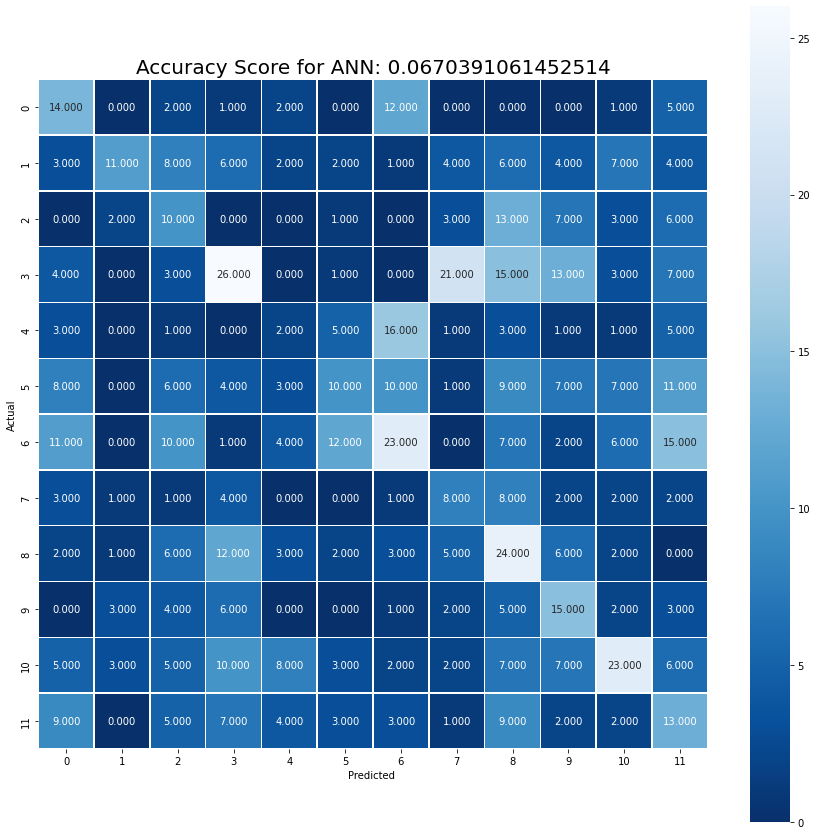

In [66]:
# Confusion Matrix
cm2 = confusion_matrix(y_test_f,y_pred_ann)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap='Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted ')
all_sample_title = 'Accuracy Score for ANN: {0}'.format(accuracy_score(y_test_f,y_pred_ann))
plt.title(all_sample_title, size = 20)

In [83]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf2 = pd.DataFrame({'Model':['ANN'],'Accuracy': ann.evaluate(X_test, y_test, verbose=0)[1]},index={'2'})
resultsdf1 = pd.concat([resultsdf1, tempResultsDf2])
resultsdf1

,Model,Accuracy
1,MultinomialNB,0.250
2,ANN,0.080


#### CNN

In [36]:
batch_size = None



#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model
model1 = tf.keras.models.Sequential()

#Adding first convolutional layer
model1.add(tf.keras.layers.Conv2D(32, #Number of filters 
                               kernel_size=(3,3), #Size of the filter
                               activation='relu',
                               input_shape=(128,128,3)))
#Add MaxPooling layer 1
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#Adding second convolutional layer
model1.add(tf.keras.layers.Conv2D(32, #Number of filters 
                               kernel_size=(3,3), #Size of the filter
                               activation='relu', padding='same'))
#Add MaxPooling layer 2
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add dropout layer
model1.add(tf.keras.layers.Dropout(0.25))

#Flatten the output
model1.add(tf.keras.layers.Flatten())

#Dense layer 1
model1.add(tf.keras.layers.Dense(256, activation='relu'))

#Add another dropout layer
model1.add(tf.keras.layers.Dropout(0.25))

#Dense layer 2
model1.add(tf.keras.layers.Dense(512, activation='relu'))

#Add another dropout layer
model1.add(tf.keras.layers.Dropout(0.25))

#Dense layer 3
model1.add(tf.keras.layers.Dense(1024, activation='relu')) #, kernel_regularizer = tf.keras.regularizers.l2( l=0.01)

#Add anoter dropout layer
model1.add(tf.keras.layers.Dropout(0.25))

#Output layer
model1.add(tf.keras.layers.Dense(12, activation='softmax'))


In [37]:
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='Adam')
model1.fit(X_train, y_train, epochs = 20, validation_data = (X_val,Y_val), batch_size = 20)

Epoch 1/20
167/167 [==============================] - 40s 237ms/step - loss: 2.1771 - accuracy: 0.2359 - val_loss: 1.6882 - val_accuracy: 0.3980
Epoch 2/20
167/167 [==============================] - 39s 234ms/step - loss: 1.6266 - accuracy: 0.4170 - val_loss: 1.5547 - val_accuracy: 0.4330
Epoch 3/20
167/167 [==============================] - 39s 232ms/step - loss: 1.4473 - accuracy: 0.4856 - val_loss: 1.4893 - val_accuracy: 0.4595
Epoch 4/20
167/167 [==============================] - 39s 232ms/step - loss: 1.2871 - accuracy: 0.5375 - val_loss: 1.3102 - val_accuracy: 0.5461
Epoch 5/20
167/167 [==============================] - 39s 231ms/step - loss: 1.1343 - accuracy: 0.6061 - val_loss: 1.2455 - val_accuracy: 0.5880
Epoch 6/20
167/167 [==============================] - 39s 232ms/step - loss: 1.0772 - accuracy: 0.6262 - val_loss: 1.1202 - val_accuracy: 0.6229
Epoch 7/20
167/167 [==============================] - 39s 232ms/step - loss: 0.9879 - accuracy: 0.6400 - val_loss: 1.1528 - val_ac

In [38]:
#Evaluate model
score = model1.evaluate(X_test, y_test, verbose=0, batch_size = 32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9277896881103516
Test accuracy: 0.6979020833969116


(<Figure size 1584x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7b4c2c6f50>)

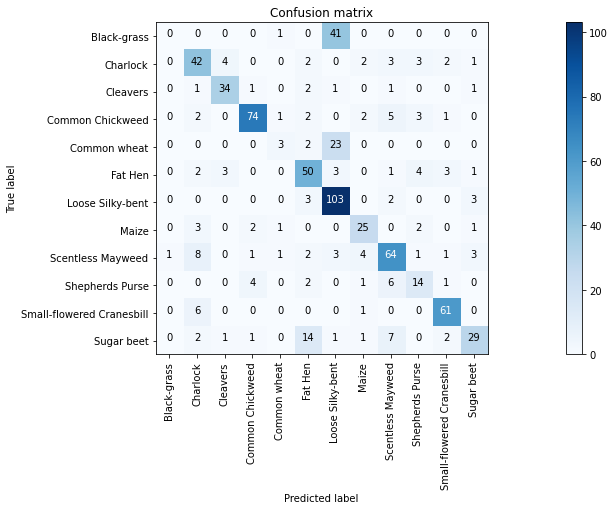

In [42]:
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model1.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = labelEncode.classes_) 

Predicted label: 6
Predicted label name: Loose Silky-bent
Softmax Outputs: [[1.4381427e-01 3.4177793e-07 2.4987798e-07 7.2535087e-08 1.3866444e-01
  6.6931745e-05 7.1636426e-01 2.2525810e-04 4.8498812e-05 1.3083283e-06
  8.1218797e-04 2.2282193e-06]]
1.0


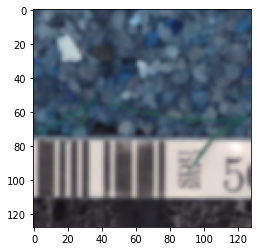

In [48]:
#visualizing 
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[2].reshape(128, 128,3))
y_pred = model1.predict(X_test[2].reshape( 1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Predicted label name:", labelEncode.classes_ [ y_pred.argmax()])
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

In [84]:
# Adding Final accuracy value to Results DataFrame
tempResultsDfCNN = pd.DataFrame({'Model':['CNN'],'Accuracy': model1.evaluate(X_val, Y_val, verbose=0)[1]},index={'3'})
resultsdf1 = pd.concat([resultsdf1, tempResultsDfCNN])
resultsdf1

,Model,Accuracy
1,MultinomialNB,0.250
2,ANN,0.080
3,CNN,0.682


Save the model for later use

In [50]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('plant_classifier.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

4. Pickle the best performing model

In [51]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('plant_classifier.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

In [54]:
#5. Import the the image in the “ Prediction” folder to predict the class. Display the image. Use the best trained image classifier model to predict the class.

(578, 578, 3)
(128, 128, 3)
After expand_dims: (1, 128, 128, 3)
Predicted label: 9
Predicted label name: Shepherds Purse
Softmax Outputs: [[1.05908526e-07 1.77126683e-04 3.76840285e-06 1.35505393e-01
  1.64673448e-08 2.61371676e-03 2.52183071e-07 2.62270942e-02
  1.54997353e-04 8.33215594e-01 2.07270961e-03 2.91663600e-05]]
0.99999994


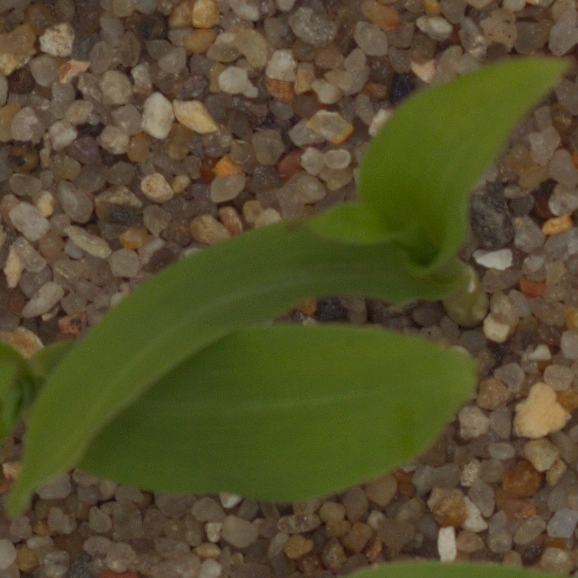

In [78]:
# from PIL import Image , ImageFilter # Image handling Library
# import cv2 # Image handling Library
test_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV/Predict.png")


# Check if the size of the Image array is compatible with Keras model
print(test_image.shape)

test_image = cv2.resize(test_image, (128,128))
print(test_image.shape)

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255.0

#Check the size of the Image array again
print('After expand_dims: '+ str(test_image.shape))



y_pred = model1.predict(test_image)
print("Predicted label:", y_pred.argmax())
print("Predicted label name:", labelEncode.classes_ [ y_pred.argmax()])
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Image.open("/content/drive/MyDrive/Colab Notebooks/CV/Predict.png")




Predicted label: 6
Predicted label name: Loose Silky-bent
Softmax Outputs: [[1.4381427e-01 3.4177793e-07 2.4987798e-07 7.2535087e-08 1.3866444e-01
  6.6931745e-05 7.1636426e-01 2.2525810e-04 4.8498812e-05 1.3083283e-06
  8.1218797e-04 2.2282193e-06]]
1.0


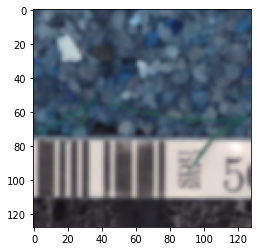

In [79]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[2].reshape(128, 128,3))
y_pred = model1.predict(X_test[2].reshape( 1, 128, 128, 3))
print("Predicted label:", y_pred.argmax())
print("Predicted label name:", labelEncode.classes_ [ y_pred.argmax()])
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

### detailed observations on the best performing algorithm and why/how it outperforms other algorithms in this case

Increasing number of epochs and adding layers to a model increases the performance, it also has an imapct on runtime, as we can see in case neural network.

understanding is 

1. MultinomialNB (supervised algorithm) gives very less score among the models used. 

2. ImageDataGenerator is used to avoid overfitting Neural network & CNN model. 

3. Neural network is better than supervised learning as it extracts feature from image data and accordingly improve acccuracy. it is very computationally intensive and due dense layer neighbourhood information is lost which result in more time in trianing the model.

4. CNN has "Conv2D" which extracts feature from images, which then is flattened and given to a dense or Fully connected layer for output. As it already extracted and reduced the feature so training time reduced and give the similar accuracy as neural network which can further increase using the hyperparameter tuning. 
